## Quantifying effect of altered switching rate on fraction

In [1]:

import numpy as np
import scipy as sp
from scipy.stats import norm
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.api as sm
import pylab 

import os

import warnings 

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/eEMC014_rep2/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/eEMC014_rep2


In [3]:
files=os.listdir('.')

In [4]:
csv_files=[]
ids=[]
for f in files:
    if ('P_counts.csv' in f):
        get_id=f[3:f.index('_')]
        if(len(get_id)>0):
            ids.append(int(get_id))
            csv_files.append(f)
        else:
            ids.append(0)
            csv_files.append(f)

file_names=pd.DataFrame({'ID':ids,'FileName':csv_files}).sort_values('ID',ascending=True)


In [5]:
file_names['Set']=file_names['ID'].apply(lambda x:int(x/49)+1)

In [6]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

## Net Switching Rate and Fraction

In [27]:
err3[:,0]

array([0.00656847, 0.01378891, 0.01592169, 0.00896879, 0.02899931,
       0.00913753, 0.00426232, 0.00813087, 0.00423858])

In [28]:
np.mean([arr_mean[0:9],arr_mean[9:18]],axis=0)[:,0]

array([0.4133958 , 0.5589065 , 0.62668529, 0.31585776, 0.507683  ,
       0.5531926 , 0.36841503, 0.58276382, 0.6040762 ])

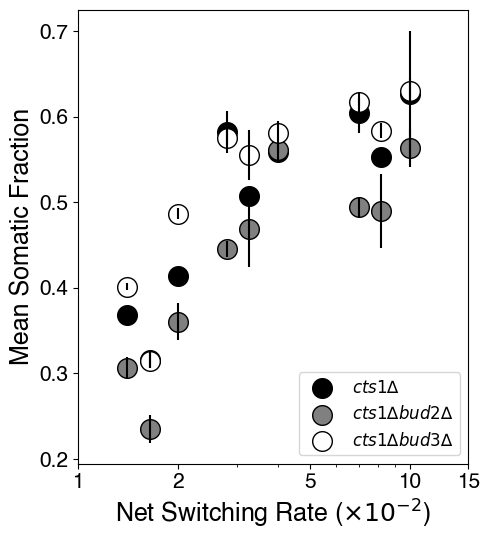

In [52]:
arr_mean=np.zeros(shape=(54,1))
for k in range(0,54):
    mas=pd.Series()
    sub_ds=file_names.loc[file_names['Set']==(k+1),'FileName']
    for f in sub_ds:
        d=pd.read_csv(f)
        mas=mas._append(d['counts'])
    mas_mixed=mas[(mas<1) & (mas>0)]
    arr_mean[k]=np.mean(mas)

gr=np.array([1,1,1,0.82,0.82,0.82,0.7,0.7,0.7])
size=200
sw=np.array([2e-2,4e-2,1e-1,2e-2,4e-2,1e-1,2e-2,4e-2,1e-1])
rate=sw*gr
plt.rc('font',family='helvetica')
plt.figure(figsize=(5,5.5))


err1=np.std([arr_mean[0:9],arr_mean[9:18]],axis=0)/np.sqrt(2)
err2=np.std([arr_mean[18:27],arr_mean[27:36]],axis=0)/np.sqrt(2)
err3=np.std([arr_mean[36:45],arr_mean[45:54]],axis=0)/np.sqrt(2)

plt.errorbar(rate,np.mean([arr_mean[0:9],arr_mean[9:18]],axis=0)[:,0],yerr=err1[:,0],fmt="none",color='black')
plt.errorbar(rate,np.mean([arr_mean[18:27],arr_mean[27:36]],axis=0)[:,0],yerr=err2[:,0],fmt="none",color='black')
plt.errorbar(rate,np.mean([arr_mean[36:45],arr_mean[45:54]],axis=0)[:,0],yerr=err3[:,0],fmt="none",color='black')

plt.scatter(rate,np.mean([arr_mean[0:9],arr_mean[9:18]],axis=0),color='black',s=size,edgecolor='k',linewidth=1)
plt.scatter(rate,np.mean([arr_mean[18:27],arr_mean[27:36]],axis=0),color='gray',s=size,edgecolor='k',linewidth=1)
plt.scatter(rate,np.mean([arr_mean[36:45],arr_mean[45:54]],axis=0),color='white',s=size,edgecolor='k',linewidth=1)

plt.xscale('log',base=10)
plt.xticks(ticks=[1e-2,2e-2,5e-2,1e-1,1.5e-1],labels=['1','2','5','10','15'],fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel(r'Net Switching Rate ($\times 10^{-2}$)',fontsize=18)
plt.ylabel('Mean Somatic Fraction',fontsize=18)
plt.legend(['$\it{cts1∆}$','$\it{cts1∆ bud2∆}$','$\it{cts1∆ bud3∆}$'],fontsize=12,loc='lower right')
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/Switching_rate_fraction_error.jpg',dpi=600)

## Gini Coeff Distribution

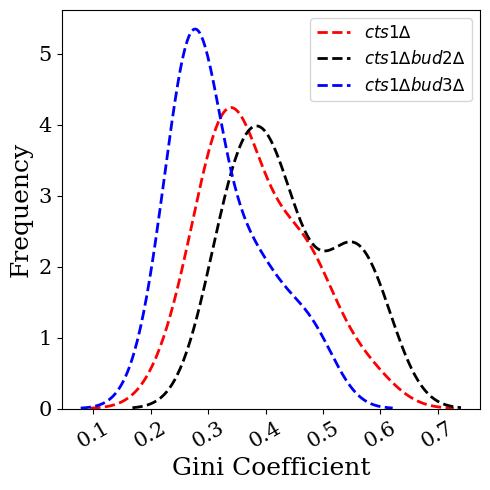

In [42]:
arr_gini=np.zeros(shape=(54,1))

for k in range(0,54):
    mas=pd.Series()
    sub_ds=file_names.loc[file_names['Set']==(k+1),'FileName']
    for f in sub_ds:
        d=pd.read_csv(f)
        mas=mas._append(d['counts'])
    mas_mixed=mas[(mas<1) & (mas>0)]
    arr_gini[k]=gini(mas)
    
gr=np.array([1,1,1,0.82,0.82,0.82,0.7,0.7,0.7])
size=100
sw=np.array([1e-1,5e-2,0.8e-2,1e-1,5e-2,0.8e-2,1e-1,5e-2,0.8e-2])
rate=gr*sw
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
sns.distplot(arr_gini[0:18],hist=False,kde_kws={'linestyle':'--','linewidth':2},color='red')
sns.distplot(arr_gini[18:36],hist=False,kde_kws={'linestyle':'--','linewidth':2},color='black')
sns.distplot(arr_gini[36:54],hist=False,kde_kws={'linestyle':'--','linewidth':2},color='blue')
plt.xticks(fontsize=15,rotation=30)
plt.yticks(fontsize=15)
plt.xlabel('Gini Coefficient',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.legend(['$\it{cts1∆}$','$\it{cts1∆ bud2∆}$','$\it{cts1∆ bud3∆}$'],fontsize=12)
plt.tight_layout()
# plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/gini_dist.jpg',dpi=600)

## Tradeoff Cluster heterogeneity and Mean Fraction

In [43]:
arr_mean_cts=np.mean([arr_mean[0:9],arr_mean[9:18]],axis=0)
arr_mean_bud2=np.mean([arr_mean[18:27],arr_mean[27:36]],axis=0)
arr_mean_bud3=np.mean([arr_mean[36:45],arr_mean[45:54]],axis=0)

arr_gini_cts=np.mean([arr_gini[0:9],arr_gini[9:18]],axis=0)
arr_gini_bud2=np.mean([arr_gini[18:27],arr_gini[27:36]],axis=0)
arr_gini_bud3=np.mean([arr_gini[36:45],arr_gini[45:54]],axis=0)

In [44]:
lreg=LinearRegression().fit(arr_mean,arr_gini)
m1=lreg.coef_
c1=lreg.intercept_
Ypred=lreg.predict(arr_mean)
r2=r2_score(arr_gini,Ypred)

NameError: name 'LinearRegression' is not defined

NameError: name 'r2_score_txt' is not defined

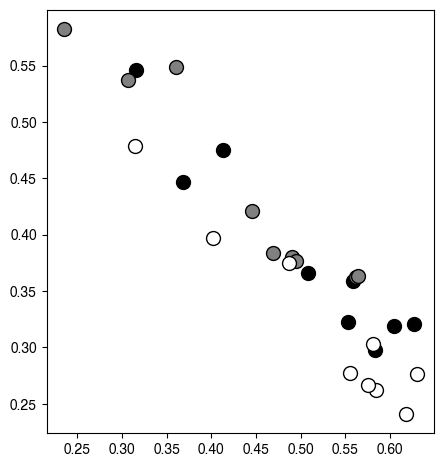

In [45]:
plt.rc('font',family='helvetica')
plt.figure(figsize=(5,5.5))
plt.scatter(arr_mean_cts,arr_gini_cts,color='black',s=size,edgecolor='k',linewidth=1)
plt.scatter(arr_mean_bud2,arr_gini_bud2,color='gray',s=size,edgecolor='k',linewidth=1)
plt.scatter(arr_mean_bud3,arr_gini_bud3,color='white',s=size,edgecolor='k',linewidth=1)
# r2_score_txt='$r^{2}=$'+str(np.round(r2,2))
plt.text(0.48,0.48,r2_score_txt,fontsize=18)
plt.xticks(ticks=[0.2,0.3,0.4,0.5,0.6,0.7],fontsize=15,rotation=0)
plt.yticks(ticks=[0.2,0.3,0.4,0.5,0.6],fontsize=15,rotation=0)

plt.xlabel('Mean Somatic Fraction',fontsize=18)
plt.ylabel('Gini Coefficient',fontsize=18)
plt.legend(['$\it{cts1∆}$','$\it{cts1∆ bud2∆}$','$\it{cts1∆ bud3∆}$'],fontsize=12)
plt.tight_layout()
# plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/mean_gini_tradeoff.jpg',dpi=600)

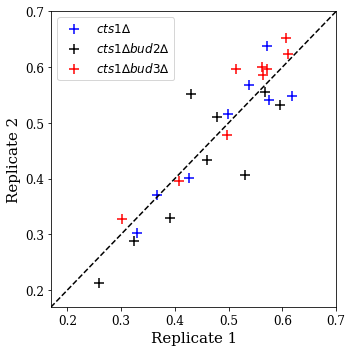

In [64]:
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
size=100
plt.scatter(arr_mean[0:9],arr_mean[9:18],color='blue',marker='+',s=size)
plt.scatter(arr_mean[18:27],arr_mean[27:36],color='black',marker='+',s=size)
plt.scatter(arr_mean[36:45],arr_mean[45:54],color='red',marker='+',s=size)
plt.legend(['$\it{cts1∆}$','$\it{cts1∆ bud2∆}$','$\it{cts1∆ bud3∆}$'],fontsize=12)
plt.plot([0,0.7],[0.,0.7],'--',color='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Replicate 1',fontsize=15)
plt.ylabel('Replicate 2',fontsize=15)
plt.xlim(0.17,0.7)
plt.ylim(0.17,0.7)
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/rep_correlation_fig7.jpg',dpi=600)

## Coefficient of Variation vs Mean

In [67]:
arr_cv=np.zeros(shape=(54,1))

for k in range(0,54):
    mas=pd.Series()
    sub_ds=file_names.loc[file_names['Set']==(k+1),'FileName']
    for f in sub_ds:
        d=pd.read_csv(f)
        mas=mas.append(d['counts'])
    arr_cv[k]=np.std(mas)/np.mean(mas)

In [68]:
arr_mean_cts=np.mean([arr_mean[0:9],arr_mean[9:18]],axis=0)
arr_mean_bud2=np.mean([arr_mean[18:27],arr_mean[27:36]],axis=0)
arr_mean_bud3=np.mean([arr_mean[36:45],arr_mean[45:54]],axis=0)

arr_cv_cts=np.mean([arr_cv[0:9],arr_cv[9:18]],axis=0)
arr_cv_bud2=np.mean([arr_cv[18:27],arr_cv[27:36]],axis=0)
arr_cv_bud3=np.mean([arr_cv[36:45],arr_cv[45:54]],axis=0)

In [69]:
lreg=LinearRegression().fit(arr_mean,arr_cv)
m1=lreg.coef_
c1=lreg.intercept_
Ypred=lreg.predict(arr_mean)
r2=r2_score(arr_cv,Ypred)

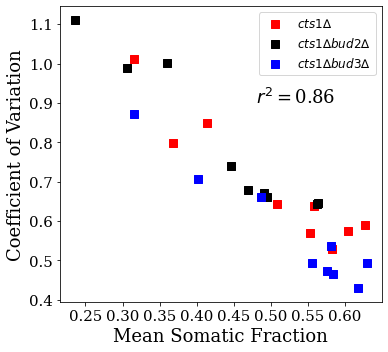

In [75]:
plt.rc('font',family='serif')
plt.figure(figsize=(5.5,5))
plt.scatter(arr_mean_cts,arr_cv_cts,marker='s',s=50,color='red')
plt.scatter(arr_mean_bud2,arr_cv_bud2,marker='s',s=50,color='black')
plt.scatter(arr_mean_bud3,arr_cv_bud3,marker='s',s=50,color='blue')
r2_score_txt='$r^{2}=$'+str(np.round(r2,2))
plt.text(0.48,0.9,r2_score_txt,fontsize=18)
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Mean Somatic Fraction',fontsize=18)
plt.ylabel('Coefficient of Variation',fontsize=18)
plt.legend(['$\it{cts1∆}$','$\it{cts1∆ bud2∆}$','$\it{cts1∆ bud3∆}$'],fontsize=12)
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/mean_cv_tradeoff.jpg',dpi=600)